# Advance Data Mining Project : Toxic Comment Classification

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Phase 1: Exploratory Data Analysis

In [4]:
path="train.csv"
df=pd.read_csv(path)

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df = df.loc[np.random.choice(df.index, size=16000)]
df.shape

(16000, 8)

In [7]:
print("Number of rows: ",df.shape[0])
print("Number of columns:",df.shape[1])
df.head()

Number of rows:  16000
Number of columns: 8


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
110865,511a0b4879388232,"Futurix, you have mistakenly presented an argu...",0,0,0,0,0,0
128389,aea0e111a6811cef,Media:Example.oggMedia:Example.oggMedia:Exampl...,0,0,0,0,0,0
121213,8888bef9452832f8,"""\n Jivesh, he is comparing respective singles...",0,0,0,0,0,0
157916,e5d0ccfed12c7f79,Health \n\nHe was really fat. No shocker he di...,0,0,0,0,0,0
106509,39bc29e4b4fefc5d,"""\n\n Restricted biotech a characeristic of na...",0,0,0,0,0,0


### Check if any missing values are present

In [8]:
print(df.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### Find the number of comments under each label

In [9]:
labels = list(df.columns.values)
labels = labels[2:]
print(labels)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [10]:
label_counts= []
for label in labels:
    label_counts.append((label, df[label].sum()))
cat_noofcomments =pd.DataFrame(label_counts, columns=['category', 'no. of comments'])
cat_noofcomments

,category,no. of comments
0,toxic,1522
1,severe_toxic,167
2,obscene,800
3,threat,41
4,insult,785
5,identity_hate,139


In [11]:
df['sums']=df.iloc[:,2:].sum(axis=1)
print("Total number of comments = ",len(df))
count_cleancomments=df[df['sums']==0]
print("Number of clean comments = ",len(count_cleancomments))
print("Number of comments with labels =",(len(df)-len(count_cleancomments)))

Total number of comments =  16000
Number of clean comments =  14386
Number of comments with labels = 1614


In [12]:
updatestats= cat_noofcomments.append({'category' : 'clean' , 'no. of comments' : len(count_cleancomments)} , ignore_index=True)

In [13]:
updatestats

,category,no. of comments
0,toxic,1522
1,severe_toxic,167
2,obscene,800
3,threat,41
4,insult,785
5,identity_hate,139
6,clean,14386


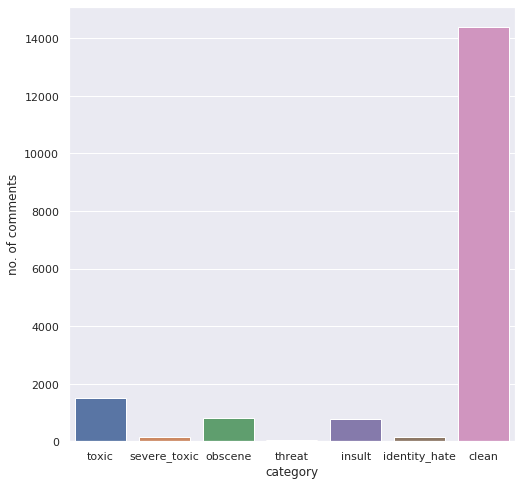

In [14]:
sns.set(font_scale = 1)
plt.figure(figsize=(8,8))
ax = sns.barplot(x="category",y="no. of comments",data=updatestats)

### Calculating number of comments having multiple labels

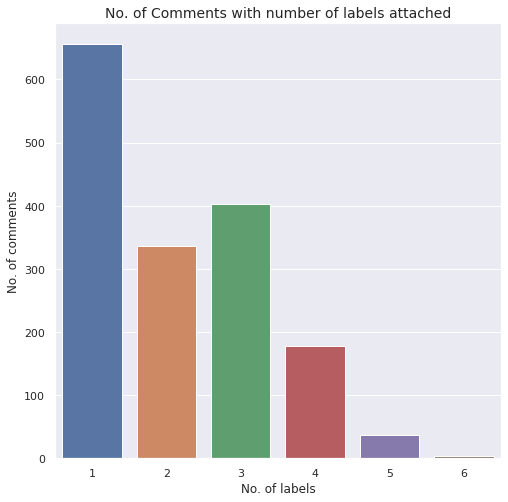

In [15]:
count_multilabel = df['sums'].value_counts()
# print(count_multilabel)
count_multilabel = count_multilabel.iloc[1:]

sns.set(font_scale=1)
plt.figure(figsize=(8,8))

ax = sns.barplot(count_multilabel.index, count_multilabel.values)


plt.title("No. of Comments with number of labels attached", fontsize=14)
plt.ylabel('No. of comments', fontsize=12)
plt.xlabel('No. of labels', fontsize=12)

plt.show()

## Data Preprocessing

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

### Cleaning Data

In [17]:
def removehtml(text):
    ctags=re.compile('<.*?>')
    withouthtml=re.sub(ctags,' ',str(text))
    return withouthtml

def removeextra(text):
    regex=re.compile('[^a-zA-Z\s]')
    cleanedtext = re.sub(regex,'',text)
    cleanedtext= cleanedtext.replace("\n",'')
    cleanedtext= cleanedtext.strip()
    return cleanedtext

In [18]:
df['comment_text']= df['comment_text'].str.lower()
df['comment_text']= df['comment_text'].apply(removehtml)
df['comment_text']= df['comment_text'].apply(removeextra)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sums
110865,511a0b4879388232,futurix you have mistakenly presented an argue...,0,0,0,0,0,0,0
128389,aea0e111a6811cef,mediaexampleoggmediaexampleoggmediaexampleoggi...,0,0,0,0,0,0,0
121213,8888bef9452832f8,jivesh he is comparing respective singles rele...,0,0,0,0,0,0,0
157916,e5d0ccfed12c7f79,health he was really fat no shocker he died,0,0,0,0,0,0,0
106509,39bc29e4b4fefc5d,restricted biotech a characeristic of nanopunk...,0,0,0,0,0,0,0


### Removing Stop Words

In [19]:
def removestopwords(text):
    new_words=[]
    for w in text.split():
        if w not in stop_words:
            new_words.append(w)
    removedstop=' '.join(word for word in new_words)
    return removedstop

def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

In [20]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
our_stop_words=set(['nine','eight','seven','six','five','four','three','two','one','zero','among','may','across','yet','within','also','however','beside'])
stop_words = Union(stop_words,our_stop_words)
df['comment_text']= df['comment_text'].apply(removestopwords)
df.head()

[nltk_data] Downloading package stopwords to /home/cli-
[nltk_data]     ninja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sums
110865,511a0b4879388232,futurix mistakenly presented arguement extensi...,0,0,0,0,0,0,0
128389,aea0e111a6811cef,mediaexampleoggmediaexampleoggmediaexampleoggi...,0,0,0,0,0,0,0
121213,8888bef9452832f8,jivesh comparing respective singles released y...,0,0,0,0,0,0,0
157916,e5d0ccfed12c7f79,health really fat shocker died,0,0,0,0,0,0,0
106509,39bc29e4b4fefc5d,restricted biotech characeristic nanopunk nd s...,0,0,0,0,0,0,0


### Perform Stemming

In [21]:
ss=SnowballStemmer("english")
def stem(text):
    stemtext=[]
    for word in text.split():
        stem= ss.stem(word)
        stemtext.append(stem)
    stemsen=' '.join(word for word in stemtext)
    return stemsen

df['comment_text'] = df['comment_text'].apply(stem)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sums
110865,511a0b4879388232,futurix mistaken present arguement extens argu...,0,0,0,0,0,0,0
128389,aea0e111a6811cef,mediaexampleoggmediaexampleoggmediaexampleoggi...,0,0,0,0,0,0,0
121213,8888bef9452832f8,jivesh compar respect singl releas year singer...,0,0,0,0,0,0,0
157916,e5d0ccfed12c7f79,health realli fat shocker die,0,0,0,0,0,0,0
106509,39bc29e4b4fefc5d,restrict biotech characerist nanopunk nd sente...,0,0,0,0,0,0,0


### Splitting dataset into train and test

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(11200, 9)
(4800, 9)


In [23]:
train_output = train['comment_text']
test_output = test['comment_text']

### Creating TF-IDF vector for train and test data

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(strip_accents='unicode',  norm='l2', analyzer='word', ngram_range=(1,3))
tfidf_vector.fit(train_output)
tfidf_vector.fit(test_output)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [25]:
x_train = tfidf_vector.transform(train_output)
y_train = train.drop(labels = ['id','comment_text','sums'], axis=1)

x_test = tfidf_vector.transform(test_output)
y_test = test.drop(labels = ['id','comment_text','sums'], axis=1)

## Phase 2: Multi Label Classification using Logistic Regression

### 1. One Vs Rest Classifier

In [26]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
ovr_model = LogisticRegression(multi_class='ovr',  solver='sag', n_jobs=-1)
for label in labels:
    ovr_model.fit(x_train, train[label])
    ovr_output = ovr_model.predict(x_test)
    print('{} Accuracy Score = {} \n'.format(label, accuracy_score(test[label], ovr_output)))

toxic Accuracy Score = 0.9204166666666667 

severe_toxic Accuracy Score = 0.9920833333333333 

obscene Accuracy Score = 0.954375 

threat Accuracy Score = 0.9975 

insult Accuracy Score = 0.95375 

identity_hate Accuracy Score = 0.9914583333333333 

CPU times: user 1.51 s, sys: 24.9 ms, total: 1.54 s
Wall time: 2 s


### 2. Binary Relevance

In [ ]:
%%time
from skmultilearn.problem_transform import BinaryRelevance
br_model = BinaryRelevance(LogisticRegression())
br_model.fit(x_train, y_train)
br_output = br_model.predict(x_test)


In [28]:

print("Accuracy Score = ",accuracy_score(y_test,br_output))
print("\n")

Accuracy Score =  0.8654166666666666




### 3. Classifier Chains

In [0]:
%%time
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
cc_model = ClassifierChain(LogisticRegression(solver='lbfgs'))
cc_model.fit(x_train, y_train)
cc_output = cc_model.predict(x_test)

In [33]:
print("Accuracy Score = ",accuracy_score(y_test,cc_output))
print("\n")

Accuracy Score =  0.90625


